## Description
### Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

### Objective

1.  Explore and visualize the dataset.
2.  Build a linear regression model to predict the prices of used cars.
3.  Generate a set of insights and recommendations that will help the business.

### Data Dictionary 

1.  S.No.: Serial Number
2.  Name: Name of the car which includes Brand name and Model name
3.  Location: The location in which the car is being sold or is available for purchase Cities
4.  Year: Manufacturing year of the car
5.  Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM.
6.  Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG (compressed natural    gas), LPG (liquefied petroleum gas))
7.  Transmission: The type of transmission used by the car. (Automatic / Manual)
8.  Owner: Type of ownership
9.  Mileage: The standard mileage offered by the car company in kmpl or km/kg (litre vs kilogram)
10. Engine: The displacement volume of the engine in CC.
11. Power: The maximum power of the engine in bhp (brake horsepower approx. = 1.014 Horsepower (hp).
12. Seats: The number of seats in the car.
13. New_Price: The price of a new car of the same model in INR Lakhs.(1 Lakh = 100,000 Rupees)
14. Price: The price of the used car in INR Lakhs (1 Lakh = 100,000 Rupees)
 

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To split training and testing data
from sklearn.model_selection import train_test_split

# To test for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# read in the data
cars = pd.read_csv("used_cars_data.csv")

In [3]:
# First look at data - random sample of 10 vehicles
np.random.seed(42)
cars.sample(n=10)

S.No.                               Name    Location  Year  \
2954   2954              Maruti Swift VXI BSIV       Delhi  2016   
6520   6520                    Maruti Ritz LDi        Pune  2016   
6036   6036        Ford Ikon 1.4 TDCi DuraTorq     Chennai  2009   
6251   6251          Ford Figo Petrol Titanium   Hyderabad  2014   
6735   6735           Maruti Vitara Brezza ZDi        Pune  2017   
2663   2663  Ford Ecosport 1.5 DV5 MT Titanium     Kolkata  2013   
5686   5686      Mercedes-Benz E-Class 280 CDI     Chennai  2007   
3809   3809                Chevrolet Cruze LTZ   Bangalore  2013   
4947   4947      Honda City 1.5 V MT Exclusive  Coimbatore  2012   
7120   7120                 Toyota Camry 2.5 G       Delhi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2954              30000    Petrol       Manual      First   20.4 kmpl   
6520             105000    Diesel       Manual     Second   23.2 kmpl   
6036             140000    Diesel       Manual      First   13.8 kmpl   
6251              33750    Petrol       Manual      First   15.6 kmpl   
6735              35000    Diesel       Manual      First   24.3 kmpl   
2663              36000    Diesel       Manual      First   22.7 kmpl   
5686              70000    Diesel    Automatic      First   11.0 kmpl   
3809              62000    Diesel       Manual     Second   18.3 kmpl   
4947              67590    Petrol       Manual      First   17.0 kmpl   
7120              61000    Petrol    Automatic      First  12.98 kmpl   

       Engine      Power  Seats   New_Price  Price  
2954  1197 CC  81.80 bhp    5.0         NaN   5.00  
6520  1248 CC  73.94 bhp    5.0         NaN    NaN  
6036  1399 CC     68 bhp    5.0         NaN    NaN  
6251  1196 CC  70.02 bhp    5.0         NaN    NaN  
6735  1248 CC   88.5 bhp    5.0  10.65 Lakh    NaN  
2663  1498 CC  89.84 bhp    5.0         NaN   4.90  
5686  2987 CC  198.5 bhp    5.0         NaN  11.00  
3809  1991 CC  147.9 bhp    5.0         NaN   6.75  
4947  1497 CC    118 bhp    5.0         NaN   5.65  
7120  2494 CC  178.4 bhp    5.0         NaN    NaN

In [4]:
# Review info on dataset - note missing data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
# determine size of dataset
print(f"There are {cars.shape[0]} rows and {cars.shape[1]} columns")

There are 7253 rows and 14 columns


In [6]:
# Check unique values for each column
cars.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [7]:
# determine exact number of missing data per column
cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
# New_Price has too many missing value as well as question of revelency 
# Serial Number non-essential to case study 
# Owner_Type comprised of 5 unique values, 1 unique value makes up 82% of allocation - usefulness in doubt
# Drop New_Price, S.No, and Owner_Type
cars1 = cars.drop(["New_Price", "S.No.","Owner_Type"], axis=1)

In [9]:
# review new data set
cars1.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission     Mileage   Engine      Power  Seats  Price  
0       CNG       Manual  26.6 km/kg   998 CC  58.16 bhp    5.0   1.75  
1    Diesel       Manual  19.67 kmpl  1582 CC  126.2 bhp    5.0  12.50  
2    Petrol       Manual   18.2 kmpl  1199 CC   88.7 bhp    5.0   4.50  
3    Diesel       Manual  20.77 kmpl  1248 CC  88.76 bhp    7.0   6.00  
4    Diesel    Automatic   15.2 kmpl  1968 CC  140.8 bhp    5.0  17.74

In [10]:
cars1.describe(include="all")

Name Location         Year  Kilometers_Driven  \
count                     7253     7253  7253.000000       7.253000e+03   
unique                    2041       11          NaN                NaN   
top     Mahindra XUV500 W8 2WD   Mumbai          NaN                NaN   
freq                        55      949          NaN                NaN   
mean                       NaN      NaN  2013.365366       5.869906e+04   
std                        NaN      NaN     3.254421       8.442772e+04   
min                        NaN      NaN  1996.000000       1.710000e+02   
25%                        NaN      NaN  2011.000000       3.400000e+04   
50%                        NaN      NaN  2014.000000       5.341600e+04   
75%                        NaN      NaN  2016.000000       7.300000e+04   
max                        NaN      NaN  2019.000000       6.500000e+06   

       Fuel_Type Transmission    Mileage   Engine   Power        Seats  \
count       7253         7253       7251     7207    7207  7200.000000   
unique         5            2        450      150     386          NaN   
top       Diesel       Manual  17.0 kmpl  1197 CC  74 bhp          NaN   
freq        3852         5204        207      732     280          NaN   
mean         NaN          NaN        NaN      NaN     NaN     5.279722   
std          NaN          NaN        NaN      NaN     NaN     0.811660   
min          NaN          NaN        NaN      NaN     NaN     0.000000   
25%          NaN          NaN        NaN      NaN     NaN     5.000000   
50%          NaN          NaN        NaN      NaN     NaN     5.000000   
75%          NaN          NaN        NaN      NaN     NaN     5.000000   
max          NaN          NaN        NaN      NaN     NaN    10.000000   

              Price  
count   6019.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       9.479468  
std       11.187917  
min        0.440000  
25%        3.500000  
50%        5.640000  
75%        9.950000  
max      160.000000

In [11]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 623.4+ KB


In [12]:
# converting 'Mileage' elements from 'object' data type to 'float' data type while also eliminating 
# unnecessary characters - 'kmpl' and 'km/kg'
cars1['Mileage']=cars1['Mileage'].str.replace('km/kg','').str.replace('kmpl','').astype(np.float64)

In [13]:
# converting 'Engine' elements from 'object' data type to 'float' data type while also eliminating 
# unnecessary characters - 'CC'
cars1['Engine']=cars1['Engine'].str.replace('CC','').astype(np.float64)

In [14]:
# reviewing 'Power' value counts for potential issues to convert from 'object' data type to 'float'
# data type - note 'null bhp' will be problematic for conversion because non-numeric
cars1.Power.value_counts()

74 bhp        280
98.6 bhp      166
73.9 bhp      152
140 bhp       142
null bhp      129
             ... 
387.3 bhp       1
182.46 bhp      1
168 bhp         1
395 bhp         1
161.6 bhp       1
Name: Power, Length: 386, dtype: int64

In [15]:
# 129 rows have 'null bhp' for Power column, to clean data and allow Power to be used in regression
# analysis, those rows are dropped and new data set created- 129 rows of data is fairly insignificant
cars2=cars1.loc[cars1['Power'] != 'null bhp']

In [16]:
# information on new data set - 7124 rows of data remaining - more than adequate sample size
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7124 non-null   object 
 1   Location           7124 non-null   object 
 2   Year               7124 non-null   int64  
 3   Kilometers_Driven  7124 non-null   int64  
 4   Fuel_Type          7124 non-null   object 
 5   Transmission       7124 non-null   object 
 6   Mileage            7122 non-null   float64
 7   Engine             7078 non-null   float64
 8   Power              7078 non-null   object 
 9   Seats              7075 non-null   float64
 10  Price              5912 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 667.9+ KB


In [17]:
# converting 'Power' elements from 'object' data type to 'float' data type while also eliminating 
# unnecessary characters - 'bhp'
cars2['Power']=cars2['Power'].str.replace('bhp', '').astype(np.float64)

In [18]:
# verifying all data types are as desired
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7124 non-null   object 
 1   Location           7124 non-null   object 
 2   Year               7124 non-null   int64  
 3   Kilometers_Driven  7124 non-null   int64  
 4   Fuel_Type          7124 non-null   object 
 5   Transmission       7124 non-null   object 
 6   Mileage            7122 non-null   float64
 7   Engine             7078 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7075 non-null   float64
 10  Price              5912 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 667.9+ KB


In [19]:
# check for missing values on latest data set
cars2.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Mileage                 2
Engine                 46
Power                  46
Seats                  49
Price                1212
dtype: int64

In [20]:
# Review unique variables in columns with 'object' data type
for colname in cars2.columns[cars2.dtypes == 'object']:
    val_counts = cars2[colname].value_counts()
    print(colname)
    print(val_counts)
    print('\n\n')

Name
Mahindra XUV500 W8 2WD                       55
Maruti Swift VDI                             49
Maruti Swift Dzire VDI                       42
Honda City 1.5 S MT                          39
Maruti Ritz VDi                              35
                                             ..
Mahindra NuvoSport N8                         1
Nissan Micra XL CVT                           1
Toyota Innova Crysta Touring Sport 2.4 MT     1
Bentley Continental Flying Spur               1
Mahindra Bolero Power Plus ZLX                1
Name: Name, Length: 1991, dtype: int64



Location
Mumbai        939
Hyderabad     851
Kochi         769
Coimbatore    764
Pune          744
Delhi         655
Kolkata       639
Chennai       572
Jaipur        488
Bangalore     431
Ahmedabad     272
Name: Location, dtype: int64



Fuel_Type
Diesel      3796
Petrol      3253
CNG           61
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Transmission
Manual       5086
Automatic    2038
Name: Tra

In [21]:
# change data type from object to category for 'Location', 'Fuel_Type' and 'Transmission'
cars2['Location']=cars2['Location'].astype('category')
cars2['Fuel_Type']=cars2['Fuel_Type'].astype('category')
cars2['Transmission']=cars2['Transmission'].astype('category')

There are too many unique variables in the 'Name' column.  Sorting the variables by Brand and Model will help to decrease the counts to allow for cleaner analysis.

In [22]:
# splitting 'Name' into multiple columns
brand=cars2['Name'].str.split(" ",2, expand=True)
brand.head()

0       1                        2
0   Maruti   Wagon                R LXI CNG
1  Hyundai   Creta       1.6 CRDi SX Option
2    Honda    Jazz                        V
3   Maruti  Ertiga                      VDI
4     Audi      A4  New 2.0 TDI Multitronic

In [23]:
brand.value_counts()

0           1         2               
Mahindra    XUV500    W8 2WD              55
Maruti      Swift     VDI                 49
                      Dzire VDI           42
Honda       City      1.5 S MT            39
Toyota      Fortuner  3.0 Diesel          35
                                          ..
Maruti      Celerio   ZXI AT Optional      1
                      ZXI Optional         1
                      ZXI Optional AMT     1
            Ciaz      1.4 Alpha            1
Ambassador  Classic   Nova Diesel          1
Length: 1990, dtype: int64

In [24]:
# drop last columns in an attempt to reduce uniqueness as there are currently 1990 unique variables
brand1=brand.drop([2], axis=1)

In [25]:
brand1.value_counts()

0           1      
Maruti      Swift      400
Honda       City       318
Hyundai     i20        303
Toyota      Innova     203
Hyundai     Verna      200
                      ... 
Nissan      370Z         1
            Evalia       1
OpelCorsa   1.4Gsi       1
Porsche     Boxster      1
Ambassador  Classic      1
Length: 215, dtype: int64

In [26]:
# dropping the last column reduced the uniqueness from 1990 to 215, however, this is still too large 
# for creating dummy columns for future analysis - it is necessary to drop one more column
brand1=brand1.drop([1], axis=1)

In [27]:
# check for uniqueness
brand1.nunique()

0    31
dtype: int64

The number of unique variables has been pared down to 31.  Unfortunately this is still too many for future analysis.  Therefore, the next step is to further consolidate by country of origin. 

In [28]:
brand1.value_counts()

Maruti           1417
Hyundai          1292
Honda             742
Toyota            485
Mercedes-Benz     378
Volkswagen        373
Ford              343
Mahindra          328
BMW               312
Audi              284
Tata              224
Skoda             201
Renault           170
Chevrolet         150
Nissan            113
Land               67
Jaguar             48
Fiat               36
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Datsun             17
Porsche            17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Lamborghini         1
OpelCorsa           1
Ambassador          1
dtype: int64

In [29]:
# replacing brand name by country of origin
brand1.columns=['brand'] #rename column
dict={'Datsun':'Japan','ISUZU':'Japan','Isuzu':'Japan', 'Honda':'Japan', 'Toyota':'Japan','Nissan':'Japan', 'Mitsubishi':'Japan',
     'Fiat':'Italy','Lamborghini':'Italy','Force':'India','Mahindra':'India','Tata':'India','Ambassador':'Hindustan','Mercedes-Benz':'Germany',
     'Volkswagen':'Germany','BMW':'Germany','Audi':'Germany','Porsche':'Germany','OpelCorsa':'Germany','Renault':'France','Skoda':'Czek',
     'Land':'Britian','Jaguar':'Britian','Mini':'Britian','Bentley':'Britian', 'Ford':'USA','Chevrolet':'USA','Jeep':'USA','Maruti':'India',
     'Volvo':'Sweden','Hyundai':'Korea'}
brand1['brand']=brand1['brand'].map(dict)
brand1.head()

brand
0    India
1    Korea
2    Japan
3    India
4  Germany

In [30]:
# add new column called 'country' to dataset 'cars2' and replace 'Name'
cars2['country']=brand1['brand']
# drop 'Name' column from data set
cars2=cars2.drop(['Name'], axis=1)

In [31]:
cars2.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission  Mileage  \
0      Mumbai  2010              72000       CNG       Manual    26.60   
1        Pune  2015              41000    Diesel       Manual    19.67   
2     Chennai  2011              46000    Petrol       Manual    18.20   
3     Chennai  2012              87000    Diesel       Manual    20.77   
4  Coimbatore  2013              40670    Diesel    Automatic    15.20   

   Engine   Power  Seats  Price  country  
0   998.0   58.16    5.0   1.75    India  
1  1582.0  126.20    5.0  12.50    Korea  
2  1199.0   88.70    5.0   4.50    Japan  
3  1248.0   88.76    7.0   6.00    India  
4  1968.0  140.80    5.0  17.74  Germany

In [32]:
cars2.country.value_counts()

India        1972
Japan        1398
Germany      1365
Korea        1292
USA           512
Czek          201
France        170
Britian       148
Italy          37
Sweden         28
Hindustan       1
Name: country, dtype: int64

Vehicles from the countries of Italy, Sweden and Hindustan include a total of 66 vehicles, which in relation to the overall dataset is an insignificat number.  Therefore, the rows containing those countries of orgin can be dropped for cleaner future analysis.

In [33]:
#deleting vehicles from Italy, Sweden and Hindustan
cars2=cars2.loc[cars2['country'] != 'Italy']
cars2=cars2.loc[cars2['country'] != 'Sweden']
cars2=cars2.loc[cars2['country'] != 'Hindustan']
cars2.country.value_counts()

India      1972
Japan      1398
Germany    1365
Korea      1292
USA         512
Czek        201
France      170
Britian     148
Name: country, dtype: int64

In [34]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7058 non-null   category
 1   Year               7058 non-null   int64   
 2   Kilometers_Driven  7058 non-null   int64   
 3   Fuel_Type          7058 non-null   category
 4   Transmission       7058 non-null   category
 5   Mileage            7056 non-null   float64 
 6   Engine             7016 non-null   float64 
 7   Power              7016 non-null   float64 
 8   Seats              7013 non-null   float64 
 9   Price              5863 non-null   float64 
 10  country            7058 non-null   object  
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 517.6+ KB


In [35]:
# check for missing values to determine how to address
cars2.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Mileage                 2
Engine                 42
Power                  42
Seats                  45
Price                1195
country                 0
dtype: int64

In [36]:
cars2.describe().T

count          mean           std      min       25%  \
Year               7058.0   2013.461887      3.175028  1998.00   2012.00   
Kilometers_Driven  7058.0  58254.844999  85286.542996   171.00  33504.25   
Mileage            7056.0     18.252140      4.410140     0.00     15.29   
Engine             7016.0   1619.583523    595.448642    72.00   1198.00   
Power              7016.0    112.518641     53.182916    34.20     75.00   
Seats              7013.0      5.286611      0.810646     2.00      5.00   
Price              5863.0      9.561605     11.160526     0.44      3.50   

                         50%       75%         max  
Year                2014.000   2016.00     2019.00  
Kilometers_Driven  53000.000  72518.00  6500000.00  
Mileage               18.215     21.10       33.54  
Engine              1495.000   1968.00     5998.00  
Power                 94.000    138.08      616.00  
Seats                  5.000      5.00       10.00  
Price                  5.700     10.00      160.00

### Univariate Analysis

Begin by plotting histograms and boxplot for all columns with numeric data to check for distribution and skewness in order to determine best method to replace missing values

In [37]:
# histogram/boxplot graphs
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

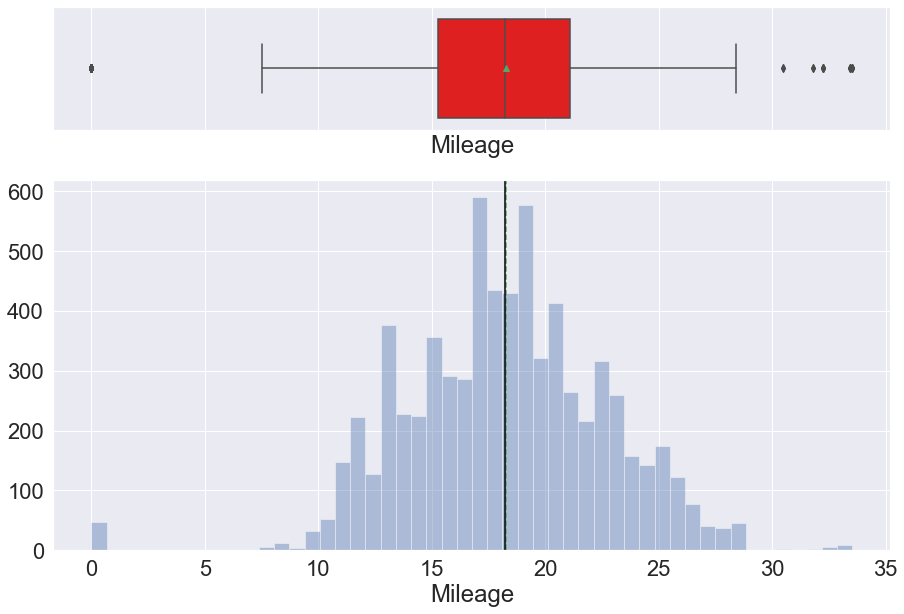

In [38]:
# visualization of 'Mileage' 
histogram_boxplot(cars2.Mileage)

'Mileage' appears to be normally distributed therefore the mean can be used to replace missing values.

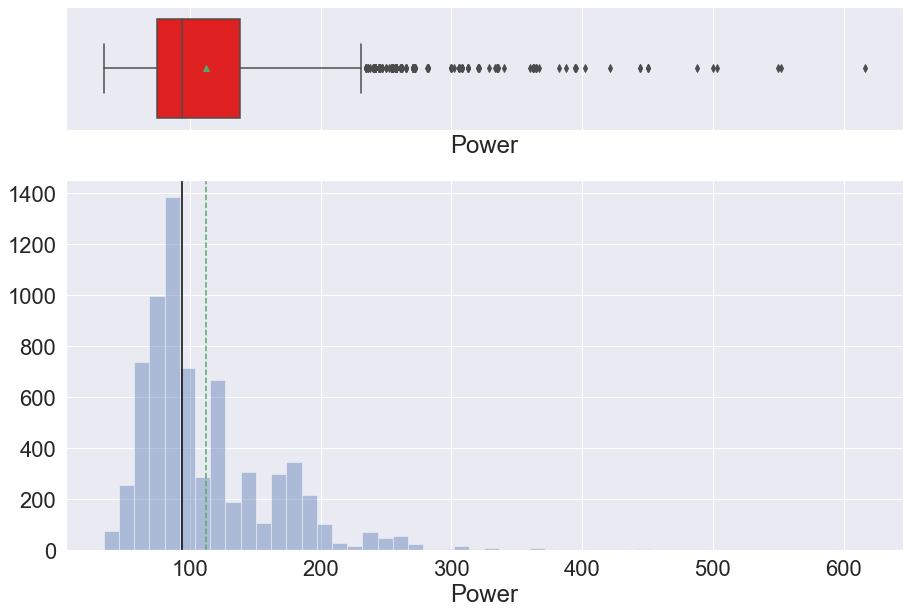

In [39]:
# visualization of 'Power'
histogram_boxplot(cars2.Power)

'Power' is right skewed and therefore using the median to replace missing values is more intuitive than using the mean

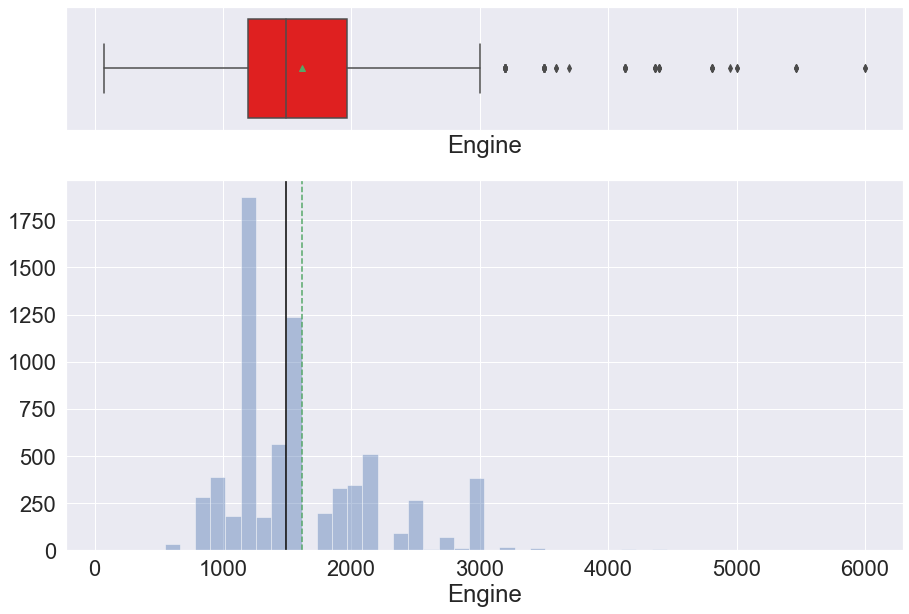

In [40]:
# Visualization of 'Engine'
histogram_boxplot(cars2.Engine)

'Engine' also appears to be right skewed.  Median method will also be used to fill in missing values

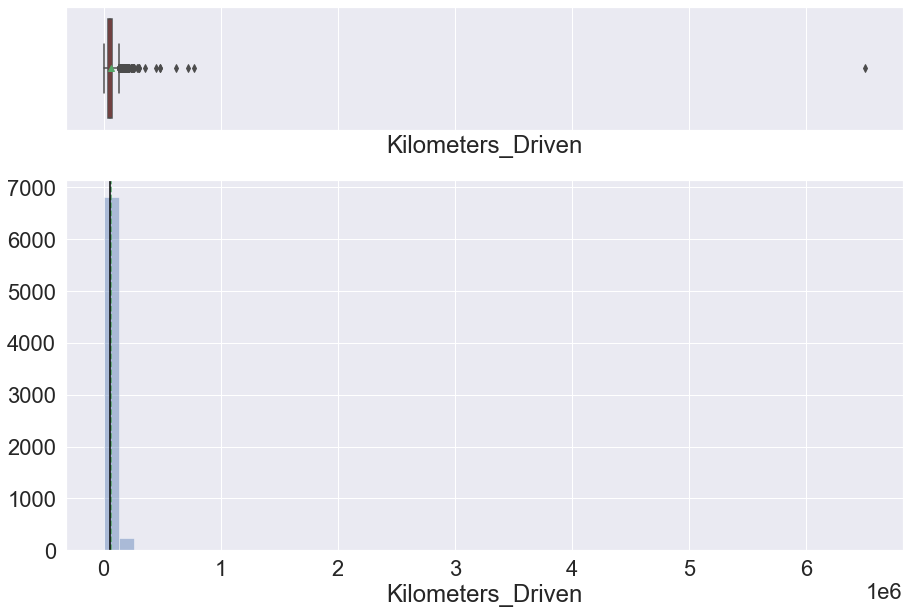

In [41]:
# Visualization of 'Kilometers_Driven'
histogram_boxplot(cars2.Kilometers_Driven)

'Kilometers_Driven' is also right skewed and has at least one very extreme outlier.  Replacing missing values using the median first and then address the outlier.

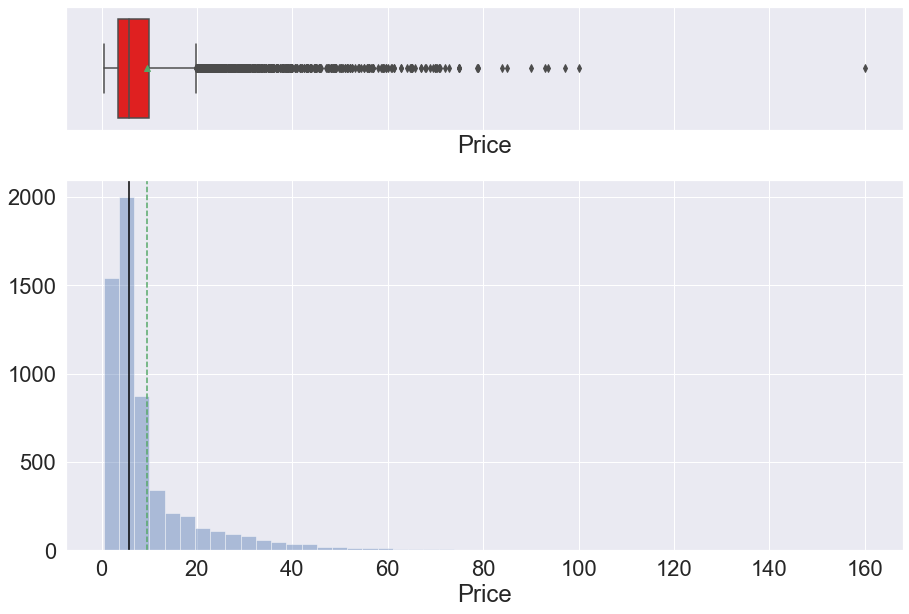

In [42]:
# visualization of 'Price'
histogram_boxplot(cars2.Price)

Price is also every right skewed as well as appearing to have a fairly extreme outlier.  Because this is the target variable it is recommended to only use actual data, not assumptions.  Therefore all rows missing data will be dropped.  

##### Filling in Missing Data

In [43]:
# review how many observations in 'Mileage' has 0.0 listed for mileage
cars2[cars2['Mileage']==0.00]

Location  Year  Kilometers_Driven Fuel_Type Transmission  Mileage  \
14          Pune  2012              85000    Diesel    Automatic      0.0   
67    Coimbatore  2019              15369    Diesel    Automatic      0.0   
194    Ahmedabad  2007              60006    Petrol       Manual      0.0   
229    Bangalore  2015              70436    Diesel       Manual      0.0   
544        Kochi  2019              13190    Petrol    Automatic      0.0   
707         Pune  2014             120000    Diesel    Automatic      0.0   
749       Mumbai  2008              55001    Diesel    Automatic      0.0   
962       Mumbai  2018               8682    Diesel    Automatic      0.0   
996         Pune  2008              93000    Petrol       Manual      0.0   
1059   Hyderabad  2010              58163    Petrol       Manual      0.0   
1259   Bangalore  2010             125000    Diesel    Automatic      0.0   
1308   Bangalore  2014              33000    Diesel    Automatic      0.0   
1354       Kochi  2011              20842    Petrol       Manual      0.0   
1385        Pune  2004             115000    Petrol       Manual      0.0   
1460  Coimbatore  2008              69078    Petrol       Manual      0.0   
1764        Pune  2015              69000    Diesel    Automatic      0.0   
2096  Coimbatore  2004              52146    Petrol       Manual      0.0   
2542   Bangalore  2011              65000    Petrol       Manual      0.0   
2681   Hyderabad  2010              54000    Petrol    Automatic      0.0   
2780        Pune  2009             100000    Petrol       Manual      0.0   
2842   Bangalore  2012              43000    Petrol       Manual      0.0   
3044     Kolkata  2009              60170    Petrol       Manual      0.0   
3093     Kolkata  2012              24720    Diesel    Automatic      0.0   
3210  Coimbatore  2016              22769    Diesel    Automatic      0.0   
3271   Bangalore  2008              35268    Petrol       Manual      0.0   
3522       Kochi  2012              66400    Petrol       Manual      0.0   
4152      Mumbai  2003              75000    Diesel    Automatic      0.0   
4234     Chennai  2012              63000    Diesel    Automatic      0.0   
4302       Delhi  2012              61449    Petrol       Manual      0.0   
4412  Coimbatore  2016              27833    Diesel    Automatic      0.0   
4687      Jaipur  2012             119203    Diesel    Automatic      0.0   
4704   Bangalore  2015              20000    Diesel    Automatic      0.0   
5016       Delhi  2013              72000    Diesel    Automatic      0.0   
5022   Hyderabad  2013              46000    Diesel    Automatic      0.0   
5270   Bangalore  2002              53000    Petrol       Manual      0.0   
5311   Hyderabad  2012             139000    Diesel    Automatic      0.0   
5374   Ahmedabad  2012              66000    Diesel    Automatic      0.0   
5875   Ahmedabad  2019               4000    Diesel    Automatic      0.0   
5972      Mumbai  2008              65000    Petrol       Manual      0.0   
6011   Hyderabad  2009              53000    Petrol    Automatic      0.0   
6090   Ahmedabad  2013              63831    Petrol       Manual      0.0   
6177   Bangalore  2012              37000    Diesel    Automatic      0.0   
6205   Ahmedabad  2007              78000    Petrol       Manual      0.0   
6491  Coimbatore  2016              22177    Diesel    Automatic      0.0   
6633     Kolkata  2016              27000    Diesel       Manual      0.0   
6857      Mumbai  2011              87000    Diesel    Automatic      0.0   
6957       Kochi  2019              11574    Petrol       Manual      0.0   
7226   Ahmedabad  2014              41000    Petrol       Manual      0.0   

      Engine   Power  Seats  Price  country  
14    2179.0  115.00    5.0  17.50  Britian  
67    1950.0  194.00    5.0  35.67  Germany  
194      NaN     NaN    NaN   2.95    Japan  
229   1498.0   99.00    NaN   3.60      USA  
544 

In [44]:
# 'Mileage' has quite a few rows with with 0.00 for the 'Mileage', which is inaccruate.  Rather than dropping those rows,
# it is more intuitive to replace those zeros with the mean because 'Mileage' is normally distributed
cars2['Mileage'].replace(0.00, cars2['Mileage'].mean(), inplace=True)

In [45]:
# verify no 0.00 values in 'Mileage'
cars2[cars2['Mileage']==0.00]

Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Mileage, Engine, Power, Seats, Price, country]
Index: []

In [46]:
cars2.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Mileage                 2
Engine                 42
Power                  42
Seats                  45
Price                1195
country                 0
dtype: int64

In [2]:
# 'Mileage' is missing 2 variables, the mean is used to fill in the missing variables because
# 'Mileage' data is normally distributed
cars2['Mileage'].fillna(cars2['Mileage'].mean(), inplace=True)

In [48]:
# 'Engine' is missing 42 variables, the median is used to fill in the missing variables because
# 'Engine' data is right skewed
cars2['Engine'].fillna(cars2['Engine'].median(), inplace=True)

In [49]:
# 'Power' is missing 42 variables, the median is used to fill in the missing variables because
# 'Power' data is also right skewed
cars2['Power'].fillna(cars2['Power'].median(), inplace=True)

In [50]:
# 'Seats' is missing 45 variables, the median is used to fill in the missing variables because
# 'Seats' data is heavily right skewed 
cars2['Seats'].fillna(cars2['Seats'].median(), inplace=True)

In [99]:
# 'Price' is missing 1195 variables, all rows with missing data are deleted because 'Price' is the dependant variable and 
# actual data is more accurate than imputing data and plugging in assumptions
cars3=cars2.dropna(axis=0, how='any')
print("Old data frame length:", len(cars2), "\nNew data frame length:", 
       len(cars3), "\nNumber of rows with at least 1 NA value: ",
       (len(cars2)-len(cars3)))

Old data frame length: 7058 
New data frame length: 5863 
Number of rows with at least 1 NA value:  1195


In [100]:
# check for missing values
cars3.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
country              0
dtype: int64

In [101]:
cars3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5863 non-null   category
 1   Year               5863 non-null   int64   
 2   Kilometers_Driven  5863 non-null   int64   
 3   Fuel_Type          5863 non-null   category
 4   Transmission       5863 non-null   category
 5   Mileage            5863 non-null   float64 
 6   Engine             5863 non-null   float64 
 7   Power              5863 non-null   float64 
 8   Seats              5863 non-null   float64 
 9   Price              5863 non-null   float64 
 10  country            5863 non-null   object  
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 430.1+ KB


In [102]:
cars3.describe().T

count          mean           std      min      25%  \
Year               5863.0   2013.457616      3.191361  1998.00   2012.0   
Kilometers_Driven  5863.0  58297.209449  92205.677862   171.00  33490.5   
Mileage            5863.0     18.370041      4.163072     7.50     15.4   
Engine             5863.0   1623.626130    599.302483    72.00   1198.0   
Power              5863.0    112.918615     53.392626    34.20     75.0   
Seats              5863.0      5.283984      0.803881     2.00      5.0   
Price              5863.0      9.561605     11.160526     0.44      3.5   

                           50%      75%         max  
Year                2014.00000   2016.0     2019.00  
Kilometers_Driven  52830.00000  72125.0  6500000.00  
Mileage               18.25214     21.1       33.54  
Engine              1495.00000   1984.0     5998.00  
Power                 94.00000    138.1      552.00  
Seats                  5.00000      5.0       10.00  
Price                  5.70000     10.0      160.00

Note that there are large discrepancies in Kilometers_Driven and Price between the upper 75% and the max values

In [103]:
# review unique values in each column to determine if any categorical data can be binned
cars3.nunique()

Location               11
Year                   22
Kilometers_Driven    3030
Fuel_Type               5
Transmission            2
Mileage               425
Engine                134
Power                 361
Seats                   8
Price                1359
country                 8
dtype: int64

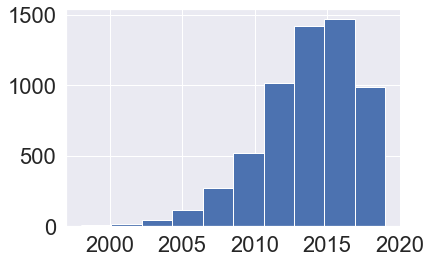

In [104]:
# review years as histogram
plt.hist(cars3.Year);

In [105]:
cars3.Year.value_counts()

2014    787
2016    735
2015    734
2013    636
2017    586
2012    567
2011    449
2010    326
2018    297
2009    192
2008    164
2007    107
2019    102
2006     69
2005     44
2004     27
2003     15
2002     12
2001      5
2000      4
1998      3
1999      2
Name: Year, dtype: int64

'Year' should be binned and then converted to 'category' data type for future data analysis.  'Seats' and 'country' should also be converted to 'category' data type for analysis purposes.

In [106]:
# create bins for years and then convert to 'category' data type
cars3['years']=pd.cut(cars3['Year'], [-np.inf, 2003, 2008, 2012, 2017, np.inf], 
     labels=['older than 2003', '2003-2008', '2008-2012', '2012-2017','newer than 2017'])
# drop 'Mileage' column
cars3.drop(['Year'], axis=1, inplace=True)
# review new column unique value counts
cars3['years'].value_counts()

2012-2017          3478
2008-2012          1534
2003-2008           411
newer than 2017     399
older than 2003      41
Name: years, dtype: int64

In [107]:
# convert Seats' and 'country' columns to 'category' data types
cars3['country']=cars3['country'].astype('category')
cars3['Seats']=cars3['Seats'].astype('category')

In [108]:
# review 'Location'
cars3.Location.value_counts()

Mumbai        777
Hyderabad     711
Kochi         642
Coimbatore    626
Pune          597
Delhi         547
Kolkata       520
Chennai       473
Jaipur        401
Bangalore     350
Ahmedabad     219
Name: Location, dtype: int64

In addition to binning 'Year', it is possible to group certain locations together to further reduce the number of unique characters under 'Location'.  Pune is close enough to Mumbai to be grouped with Mumbai, labeled 'Mumbai Region'.  Kochi, Koimbartore, Chennai and Bangalore are relatively close as well and will be grouped under 'Southern Region' heading.  This should reduce the number of unique characters from 11 to 7. 

In [109]:
dict={'Kochi':'Southern Region','Mumbai':'Mumbai Region', 'Coimbatore':'Southern Region', 'Pune':'Mumbai Region', 
      'Chennai':'Southern Region', 'Bangalore':'Southern Region', 'Hyderabad':'Hyderabad', 'Delhi':'Delhi', 'Kolkata':'Kolkata',
     'Jaipur':'Jaipur', 'Ahmedabad':'Ahmedabad'}
cars3['Location']=cars3['Location'].map(dict)
#cars3.Location.astype('category')
cars3.Location.value_counts()

Southern Region    2091
Mumbai Region      1374
Hyderabad           711
Delhi               547
Kolkata             520
Jaipur              401
Ahmedabad           219
Name: Location, dtype: int64

In [110]:
# review dataset info to verify datatype conversions
cars3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5863 non-null   object  
 1   Kilometers_Driven  5863 non-null   int64   
 2   Fuel_Type          5863 non-null   category
 3   Transmission       5863 non-null   category
 4   Mileage            5863 non-null   float64 
 5   Engine             5863 non-null   float64 
 6   Power              5863 non-null   float64 
 7   Seats              5863 non-null   category
 8   Price              5863 non-null   float64 
 9   country            5863 non-null   category
 10  years              5863 non-null   category
dtypes: category(5), float64(4), int64(1), object(1)
memory usage: 350.5+ KB


In [111]:
# convert 'Location' data type to 'category'
cars3['Location']=cars3['Location'].astype('category')

#####  Generate boxplots for all remaining numeric columns to determine effect of replacing missing values

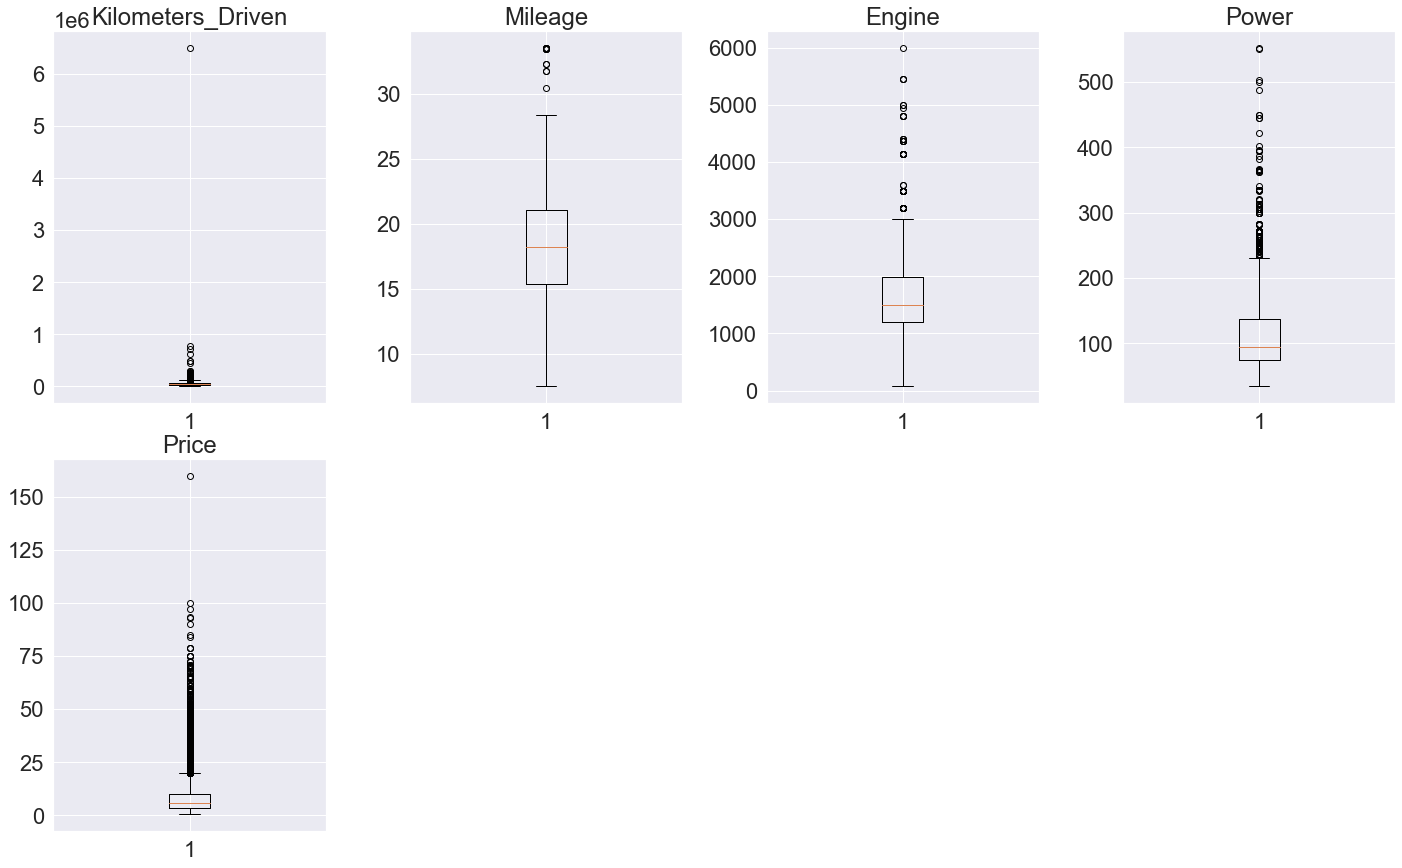

In [112]:
# Generate the boxplots of all remaining numerical columns
numeric_columns = cars3.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(cars3[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- 'Kilometers_Driven' still requires more attention to outliers and then consider creating bins for analysis because there are 3610 unique variables
- 'Mileage' is normally distributed with few outliers - however, due to 433 unique chacters, binning is necessary for analysis 
- 'Engine' and 'Power' both have outliers in the upper region and need to be standardized for analysis
- 'Price' clearly has an outlier that should be addressed

##### Standardize 'Engine' and 'Power'
Standardizing continuous features values allows for easier comparison between variables with different units of measure by converting values into the count of standard deviations each variable is from the mean of the data set while still mainting the continuous features.   

In [113]:
#initialize Standard Scaler
std_scal=StandardScaler()
# create new column for 'Engine' with standardized data
cars3['Engine_z']=std_scal.fit_transform(cars3[['Engine']])
# creat new column for 'Power' with standardized data
cars3['Power_z']=std_scal.fit_transform(cars3[['Power']])
# drop 'Engine' and 'Power' columns
cars3.drop(['Engine'], axis=1, inplace=True)
cars3.drop(['Power'], axis=1, inplace=True)
# round observations in 'Engine_z' and 'Power_z' to 3 places for future analysis
cars3['Engine_z']=round(cars3['Engine_z'], 3)
cars3['Power_z']=round(cars3['Power_z'],3)

##### Addressing the outliers 
By creating a floor and a cap or ceiling for the data, we eliminate extreme variables.  This is done by designating upper and lower whiskers based on the interquartile range.  Any value falling outside the designated whiskers will be assigned the value of its respective whisker. 

In [114]:
cars3.describe().T

count          mean           std      min       25%  \
Kilometers_Driven  5863.0  58297.209449  92205.677862  171.000  33490.50   
Mileage            5863.0     18.370041      4.163072    7.500     15.40   
Price              5863.0      9.561605     11.160526    0.440      3.50   
Engine_z           5863.0      0.000035      1.000108   -2.589     -0.71   
Power_z            5863.0     -0.000007      1.000066   -1.474     -0.71   

                           50%        75%          max  
Kilometers_Driven  52830.00000  72125.000  6500000.000  
Mileage               18.25214     21.100       33.540  
Price                  5.70000     10.000      160.000  
Engine_z              -0.21500      0.601        7.300  
Power_z               -0.35400      0.472        8.224

In [115]:
# create floor and cap for 'Kilometers_Driven' to eliminate extreme outlier
Q1 = cars3['Kilometers_Driven'].quantile(0.25)  # 25th quantile
Q3 = cars3['Kilometers_Driven'].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5* IQR # multiplier of 3 is chosen after reviewing data to determine how high is reasonable for an outlier

# create new column to overwrite existing column that includes adjusted data.
cars3['Kilometers_Driven'] = np.clip(cars3['Kilometers_Driven'], Low_W, Up_W)

In [116]:
# create floor and cap for 'Engine' to eliminate extreme outlier
Q1 = cars3['Engine_z'].quantile(0.25)  # 25th quantile
Q3 = cars3['Engine_z'].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5 * IQR # multiplier of 2.5 is chosen after reviewing data to determine how high is reasonable for an outlier

# create new column to overwrite existing column that includes adjusted data.
cars3['Engine_z'] = np.clip(cars3['Engine_z'], Low_W, Up_W)

In [117]:
# create floor and cap for 'Power' to eliminate extreme outlier
Q1 = cars3['Power_z'].quantile(0.25)  # 25th quantile
Q3 = cars3['Power_z'].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5 * IQR #multiplier of 4 is chosen after reviewing data to determine how high is reasonable for an outlier

# create new column to overwrite existing column that includes adjusted data.
cars3['Power_z'] = np.clip(cars3['Power_z'], Low_W, Up_W)

In [138]:
# create floor and cap for 'Mileage' to eliminate extreme outlier
Q1 = cars3['Mileage'].quantile(0.25)  # 25th quantile
Q3 = cars3['Mileage'].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5 * IQR #multiplier of 4 is chosen after reviewing data to determine how high is reasonable for an outlier

# create new column to overwrite existing column that includes adjusted data.
cars3['Mileage'] = np.clip(cars3['Mileage'], Low_W, Up_W)

In [139]:
# delete outlier row for 'Price' with value of 160lahk
cars3 = cars3.loc[cars3['Price']!= 160] 

In [140]:
cars3.describe().T

count          mean           std      min       25%  \
Kilometers_Driven  5862.0  55645.487163  29783.284336  171.000  33497.00   
Mileage            5862.0     18.363237      4.138856    7.500     15.40   
Price              5862.0      9.535942     10.987107    0.440      3.50   
Engine_z           5862.0     -0.013092      0.950079   -2.589     -0.71   
Power_z            5862.0     -0.035113      0.875988   -1.474     -0.71   

                           50%        75%          max  
Kilometers_Driven  52862.50000  72128.500  130076.7500  
Mileage               18.25214     21.100      29.6500  
Price                  5.70000     10.000     100.0000  
Engine_z              -0.21500      0.601       2.5675  
Power_z               -0.35400      0.472       2.2450

##### Creating Bins for 'Mileage'
According to the descriptive table above, the minimum mileage is 0.00 and the maximum mileage is 33.54 kmpl.  There are 438 unique variables.  If we create bins in increments of 5kmpl, this will create 7 unique bins or variables.

In [121]:
#create new column to assign mileage to specfic bins, adding custom labels
#cars3['mileage_bin']=pd.cut(cars3['Mileage'], [-np.inf, 5, 10, 15, 20, 25, 30, np.inf], 
     #labels=['less than 5 kmpl', '5-10 kmpl', '10-15 kmpl', '15-20 kmpl','20-25 kmpl','25-30 kmpl', 
            # 'more than 30 kmpl'])
# drop 'Mileage' column
#cars3.drop(['Mileage'], axis=1, inplace=True)
# review new column unique value counts
#cars3['mileage_bin'].value_counts()

##### Review Boxplots again, with new columns

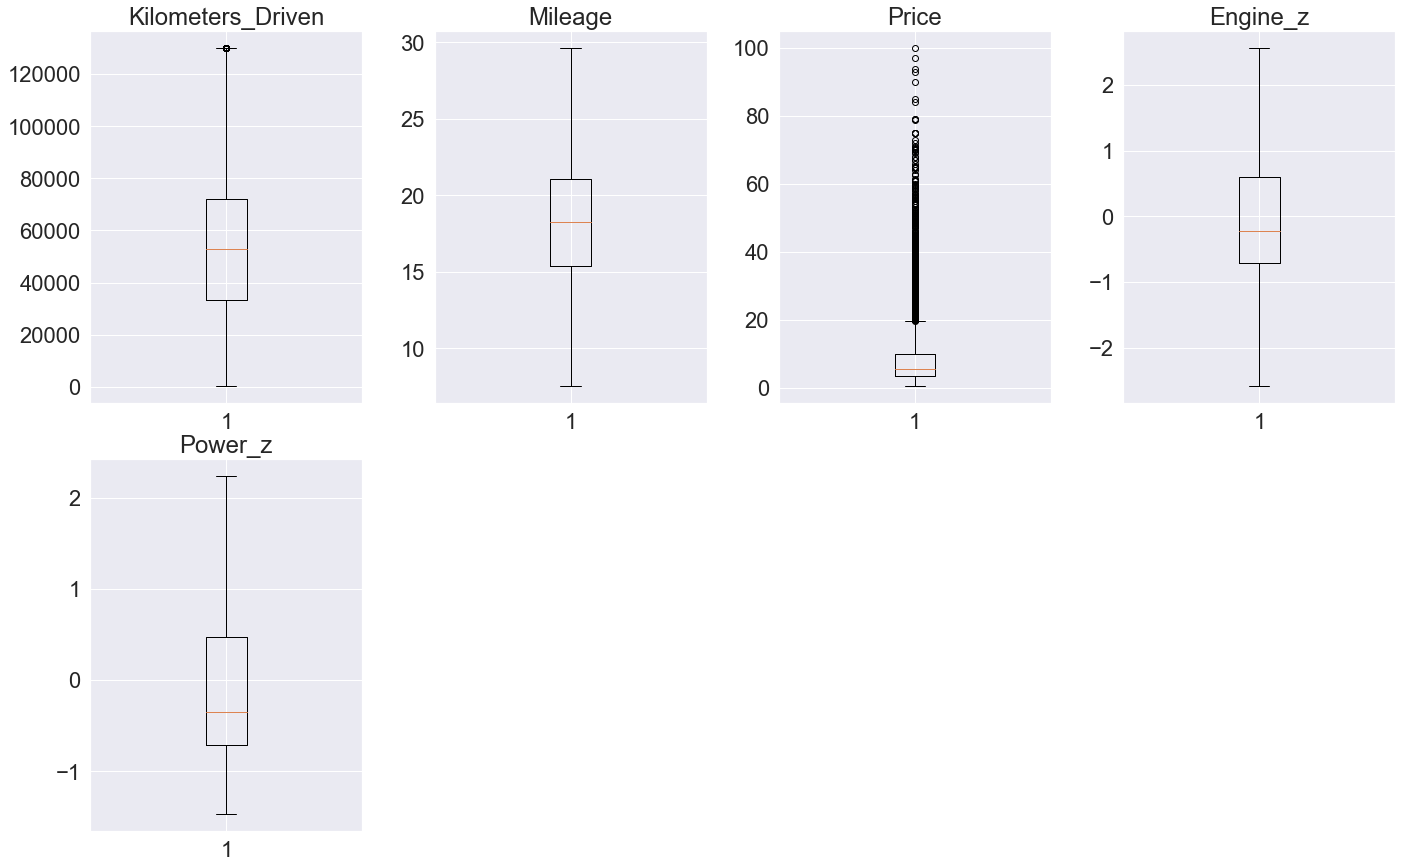

In [141]:
# Generate the boxplots again of all remaining numerical columns
numeric_columns = cars3.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(cars3[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

###### Conclusion
- 'Kilometers_Driven' no longer has any extreme outliers
- The outliers for 'Price' remain because it is the dependant variable and capping the outliers would generate assumptions rather than actual data
- 'Engine_z' and 'Power_z' have replaced 'Engine' and 'Power' respectively, because those categories have also been standardized for easier analysis
- Note, 'Mileage' is no longer listed because it has been binned and converted into a categorical variable for future analysis and the outliers are more reasonable looking

##### Generate a Profile Report for an in depth overview of the data

In [142]:
#create profile report for cars3 dataset
cars_profile=ProfileReport(cars3)

In [143]:
cars_profile

##### Profile Conclusion
- No missing values
- High correlation between 'Engine_z' and 7 other variables - 'mileage_bin', 'Fuel_Type', 'Transmission', 'Power_z', 'Seats', 'country', and 'price'
- High correlation between 'Transmission' and 3 other variables - 'Country', 'Power_z' and 'Price'
- High correlation between 'Power_z', 'Price' and 'country' 
- High correlation between 'Kilometers_Driven' and 'Year'


### Multivariate Analysis
Further analysis is necessary to assess the high correlations detailed in the profile report

#### 'Engine_z' correlations

*'Engine_z' vs. 'Power_z' with regards to 'Transmission'*

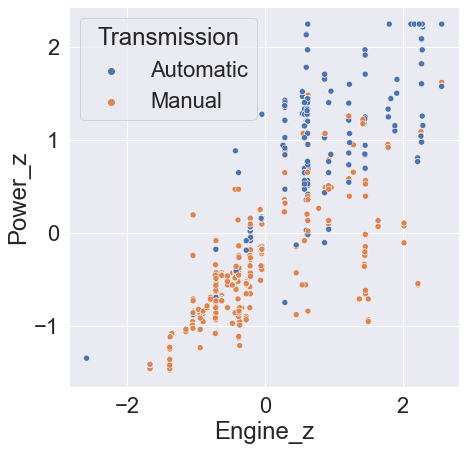

In [144]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Engine_z', y='Power_z', hue='Transmission', data=cars3);

There is a positive correlation between 'Engine_z' and 'Power_z'.  Also, manual transmissions tend to be associated with smaller engines and have less power than automatic.


*'Engine_z' vs. 'Fuel_Type' with regards to 'Mileage'*


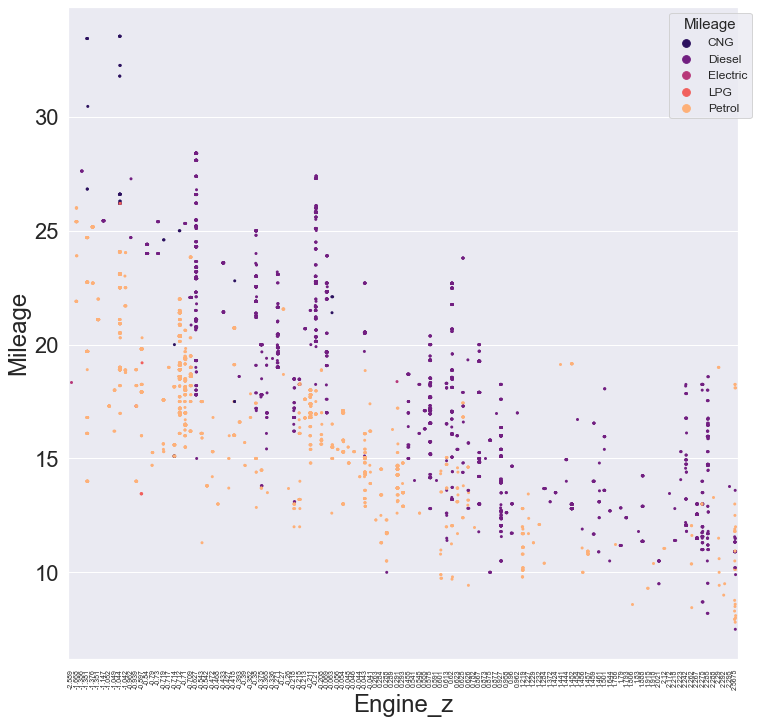

In [128]:
plt.figure(figsize=(12,12))
fuel_mile=sns.stripplot(x='Engine_z', y='Mileage', hue='Fuel_Type', data=cars3, palette='magma', size=3)
fuel_mile.legend(bbox_to_anchor=(1.03,1), fontsize=12, title="Fuel Type", title_fontsize=15)
fuel_mile.set_xticklabels(fuel_mile.get_xticklabels(), rotation=90, fontsize=7)
plt.show();

<Figure size 1800x1080 with 0 Axes>

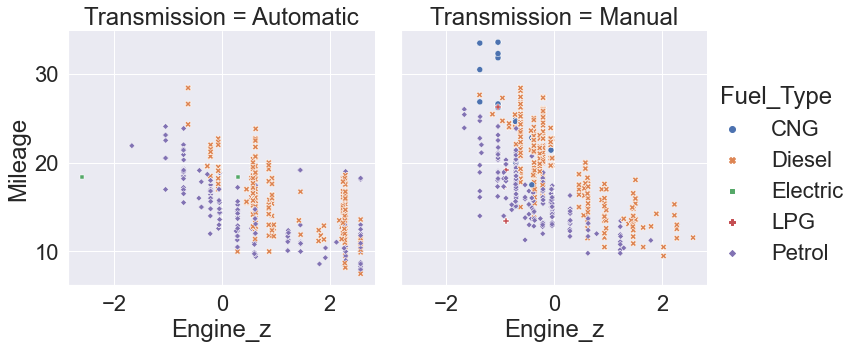

In [133]:
plt.figure(figsize=(25,15))
sns.relplot(
    data=cars3, x="Engine_z", y="Mileage",
    col="Transmission", hue="Fuel_Type", style='Fuel_Type',
    kind="scatter"
);

The larger the engine, the less the mileage.  Larger engines are either Petrol or Diesel powered.  Engines clustered more around the mean engine size tend to have better mileage. Diesel engines appear to get better mileage. Electric engines have automatic transmissions and LPG and CNG have manual.

*'Engine_z' vs. 'Price' in regards to 'Seats'*

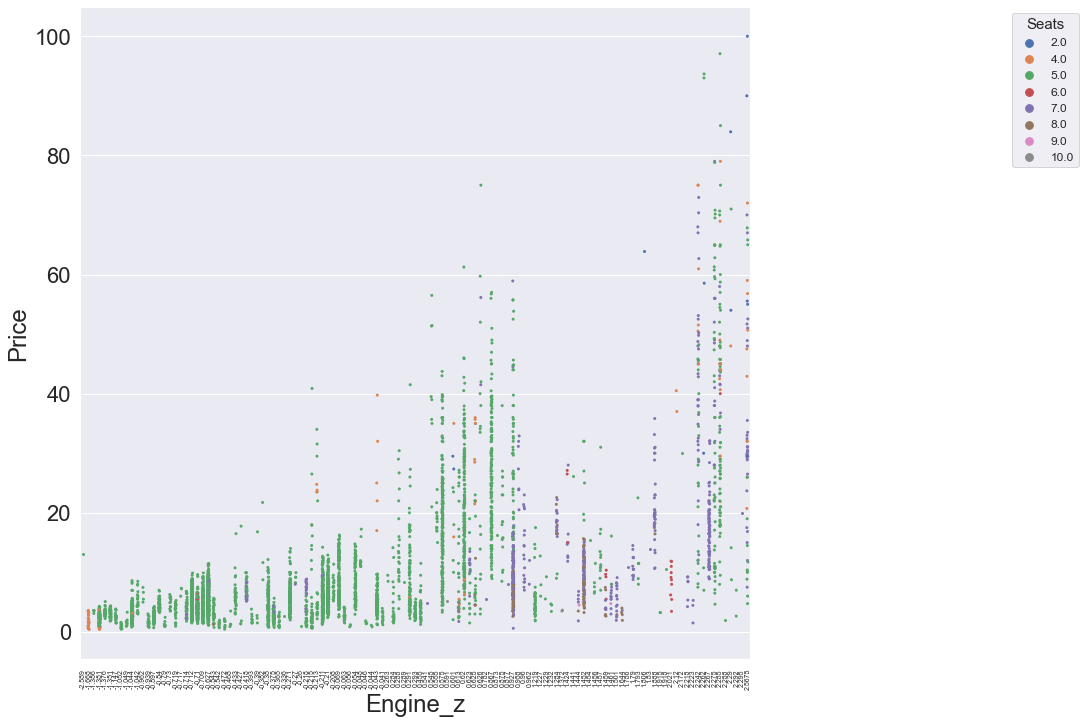

In [134]:
plt.figure(figsize=(12,12))
engine_price=sns.stripplot(x='Engine_z', y='Price', hue='Seats', data=cars3, jitter=1, size=3)
engine_price.legend(bbox_to_anchor=(1.5,1), fontsize=12, title="Seats", title_fontsize=15)
engine_price.set_xticklabels(engine_price.get_xticklabels(), rotation=90, fontsize=7)
plt.show();

Vehicles with five seats are clearly predominant in this sample set.  They also tend to have smaller engines and lower prices. 

*'Engine_z' vs. 'mileage_bin' with 'Seats' 

In [ ]:
import matplotlib.ticker as plticker
plt.figure(figsize=(10,10))
engine_mile=sns.stripplot(x='Mileage', y='Engine_z', hue='Seats', data=cars3, size=4)
engine_mile.legend(bbox_to_anchor=(1.5,1), fontsize=12, title="Seats", title_fontsize=15)
#loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
#engine_mile.xaxis.set_major_locator(loc)
#plt.xticks(np.arange(min(x), max(x)+1,5.0))
engine_mile.set_xticklabels(engine_mile.get_xticklabels(), rotation=90, fontsize=5)
plt.show();

Vehicles with between 4 and 8 seats tend to have the best mileage as well as being within 2 standard deviations of the mean engine size. Better mileage is found on vehicles found to be within 2 standard deviations below the average engine size.

*'Price' vs. 'country' with 'Transmission' 

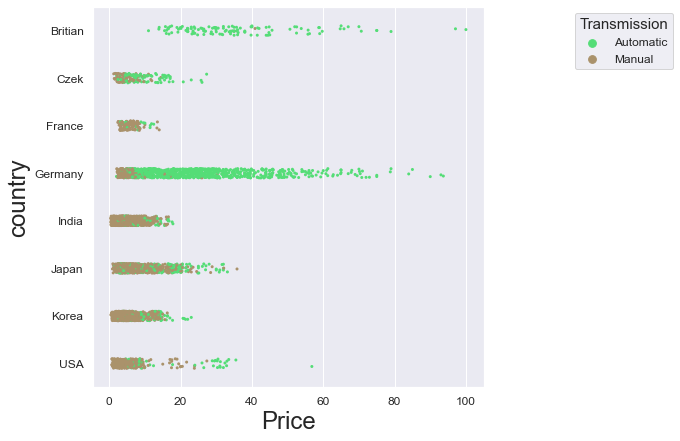

In [80]:
plt.figure(figsize=(7,7))
brand_trans=sns.stripplot(y='country', x='Price', hue='Transmission', data=cars3, palette='terrain', size=3)
brand_trans.tick_params(labelsize=12)
brand_trans.legend(bbox_to_anchor=(1.5,1), fontsize=12, title="Transmission", title_fontsize=15)
plt.show();

This plot depicts that more German brands of vehicle offer automatic transmission (a convenience) than the other brands. German brand vehicles tend to be more luxury brands - Mercedes-Benz, Audi, BMW, etc.  British vehicles tend to only offer automatic transmissions.  Vehicles from both Germany and Britian tend to be higher prices

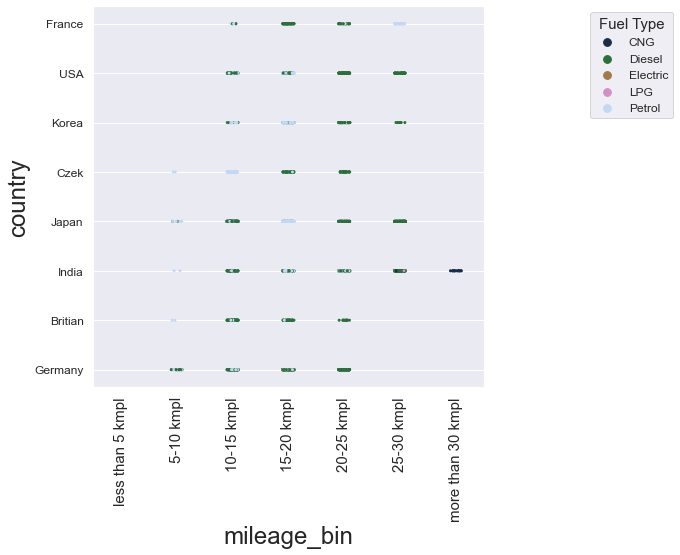

In [81]:
plt.figure(figsize=(7,7))
brand_mile=sns.stripplot(y='country', x='Mileage', hue='Fuel_Type', data=cars3, palette='cubehelix', size=3)
brand_mile.tick_params(labelsize=12)
brand_mile.legend(bbox_to_anchor=(1.5,1), fontsize=12, title="Fuel Type", title_fontsize=15)
brand_mile.set_xticklabels(brand_mile.get_xticklabels(), rotation=90, fontsize=5)
plt.show();

It appears the majority of brands offer predominantly Diesel and Petrol powered engines, with the strongest groupings in 10-15 kmpl and 15-20 kmpl mileage ranges.

*'Years' vs. 'Kilometers_Driven'*

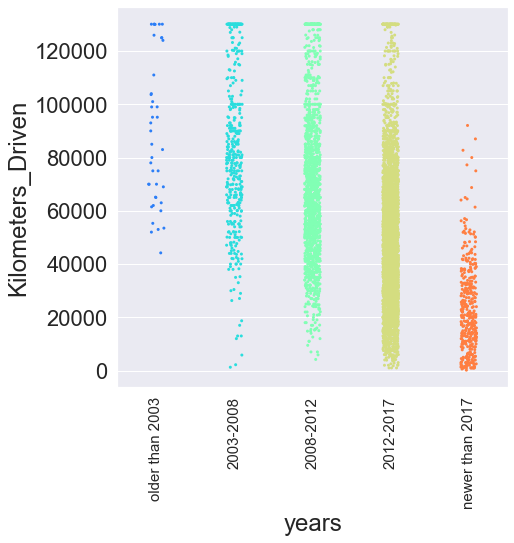

In [82]:
plt.figure(figsize=(7,7))
years_kilo=sns.stripplot(x='years', y='Kilometers_Driven', data=cars3, palette='rainbow', size=3)
years_kilo.set_xticklabels(years_kilo.get_xticklabels(), rotation=90, fontsize=15);

Older vehicles tend to have more kilometers driven than newer vehicles.  Also worth noting, most vehicles are 2008 or newer.

## Preparing Data for Modeling

In [83]:
cars3.head()

Location  Kilometers_Driven Fuel_Type Transmission Seats  Price  \
0    Mumbai Region            72000.0       CNG       Manual   5.0   1.75   
1    Mumbai Region            41000.0    Diesel       Manual   5.0  12.50   
2  Southern Region            46000.0    Petrol       Manual   5.0   4.50   
3  Southern Region            87000.0    Diesel       Manual   7.0   6.00   
4  Southern Region            40670.0    Diesel    Automatic   5.0  17.74   

   country      years  Engine_z  Power_z mileage_bin  
0    India  2008-2012    -1.044   -1.026  25-30 kmpl  
1    Korea  2012-2017    -0.069    0.249  15-20 kmpl  
2    Japan  2008-2012    -0.709   -0.454  15-20 kmpl  
3    India  2008-2012    -0.627   -0.453  20-25 kmpl  
4  Germany  2012-2017     0.575    0.522  15-20 kmpl

In [84]:
x=cars3.drop(['Price'], axis=1)
y=cars3[['Price']]

In [85]:
x.head()

Location  Kilometers_Driven Fuel_Type Transmission Seats  country  \
0    Mumbai Region            72000.0       CNG       Manual   5.0    India   
1    Mumbai Region            41000.0    Diesel       Manual   5.0    Korea   
2  Southern Region            46000.0    Petrol       Manual   5.0    Japan   
3  Southern Region            87000.0    Diesel       Manual   7.0    India   
4  Southern Region            40670.0    Diesel    Automatic   5.0  Germany   

       years  Engine_z  Power_z mileage_bin  
0  2008-2012    -1.044   -1.026  25-30 kmpl  
1  2012-2017    -0.069    0.249  15-20 kmpl  
2  2008-2012    -0.709   -0.454  15-20 kmpl  
3  2008-2012    -0.627   -0.453  20-25 kmpl  
4  2012-2017     0.575    0.522  15-20 kmpl

In [86]:
y.head()

Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74

In [87]:
print(f"x has {x.shape[0]} rows and {x.shape[1]} columns")
print(f"y has {y.shape[0]} rows and {y.shape[1]} column")

x has 5862 rows and 10 columns
y has 5862 rows and 1 column


In [88]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5862 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5862 non-null   category
 1   Kilometers_Driven  5862 non-null   float64 
 2   Fuel_Type          5862 non-null   category
 3   Transmission       5862 non-null   category
 4   Seats              5862 non-null   category
 5   country            5862 non-null   category
 6   years              5862 non-null   category
 7   Engine_z           5862 non-null   float64 
 8   Power_z            5862 non-null   float64 
 9   mileage_bin        5862 non-null   category
dtypes: category(7), float64(3)
memory usage: 385.2 KB


In [89]:
# create dummy columns from all categorical data type columns
x=pd.get_dummies(x, columns=['Location','Fuel_Type','Transmission','Seats','country','years'],drop_first=True)
x.head()

Kilometers_Driven  Engine_z  Power_z  Location_Delhi  Location_Hyderabad  \
0            72000.0    -1.044   -1.026               0                   0   
1            41000.0    -0.069    0.249               0                   0   
2            46000.0    -0.709   -0.454               0                   0   
3            87000.0    -0.627   -0.453               0                   0   
4            40670.0     0.575    0.522               0                   0   

   Location_Jaipur  Location_Kolkata  Location_Mumbai Region  \
0                0                 0                       1   
1                0                 0                       1   
2                0                 0                       0   
3                0                 0                       0   
4                0                 0                       0   

   Location_Southern Region  Fuel_Type_Diesel  Fuel_Type_Electric  \
0                         0                 0                   0   
1                         0                 1                   0   
2                         1                 0                   0   
3                         1                 1                   0   
4                         1                 1                   0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  Seats_4.0  Seats_5.0  \
0              0                 0                    1          0          1   
1              0                 0                    1          0          1   
2              0                 1                    1          0          1   
3              0                 0                    1          0          0   
4              0                 0                    0          0          1   

   Seats_6.0  Seats_7.0  Seats_8.0  Seats_9.0  Seats_10.0  country_Czek  \
0          0          0          0          0           0             0   
1          0          0          0          0           0             0   
2          0          0          0          0           0             0   
3          0          1          0          0           0             0   
4          0          0          0          0           0             0   

   country_France  country_Germany  country_India  country_Japan  \
0               0                0              1              0   
1               0                0              0              0   
2               0                0              0              1   
3               0                0              1              0   
4               0                1              0              0   

   country_Korea  country_USA  years_2003-2008  years_2008-2012  \
0              0            0                0                1   
1              1            0                0                0   
2              0            0                0                1   
3              0            0                0                1   
4              0            0                0                0   

   years_2012-2017  years_newer than 2017  mileage_bin_5-10 kmpl  \
0                0                      0                      0   
1                1                      0                      0   
2                0                      0                      0   
3                0                      0                      0   
4                1                      0                      0   

   mileage_bin_10-15 kmpl  mileage_bin_15-20 kmpl  mileage_bin_20-25 kmpl  \
0                       0                       0                       0   
1                       0                       1                       0   
2                       0                       1                       0   
3                       0                       0                       1   
4                       0                       1                       0   

   mileage_bin_25-30 kmpl  mileage_bin_more than 30 kmpl  
0                       1                      

In [90]:
#split data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [91]:
x_train.head()

Kilometers_Driven  Engine_z  Power_z  Location_Delhi  \
5187            48656.0    -0.054    0.157               0   
1475            12000.0    -0.712   -0.559               0   
2210            57000.0    -1.044   -0.858               0   
3626            92885.0    -0.375   -0.841               0   
220             25166.0    -0.712   -0.582               0   

      Location_Hyderabad  Location_Jaipur  Location_Kolkata  \
5187                   0                0                 0   
1475                   0                0                 0   
2210                   0                0                 0   
3626                   0                0                 0   
220                    0                0                 0   

      Location_Mumbai Region  Location_Southern Region  Fuel_Type_Diesel  \
5187                       1                         0                 0   
1475                       1                         0                 0   
2210                       0                         1                 0   
3626                       0                         1                 1   
220                        0                         1                 0   

      Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
5187                   0              0                 1   
1475                   0              0                 1   
2210                   0              0                 1   
3626                   0              0                 0   
220                    0              0                 1   

      Transmission_Manual  Seats_4.0  Seats_5.0  Seats_6.0  Seats_7.0  \
5187                    0          0          1          0          0   
1475                    1          0          1          0          0   
2210                    0          0          1          0          0   
3626                    1          0          1          0          0   
220                     1          0          1          0          0   

      Seats_8.0  Seats_9.0  Seats_10.0  country_Czek  country_France  \
5187          0          0           0             0               0   
1475          0          0           0             0               0   
2210          0          0           0             0               0   
3626          0          0           0             0               0   
220           0          0           0             0               0   

      country_Germany  country_India  country_Japan  country_Korea  \
5187                0              0              0              1   
1475                0              1              0              0   
2210                0              1              0              0   
3626                0              0              0              0   
220                 0              0              0              1   

      country_USA  years_2003-2008  years_2008-2012  years_2012-2017  \
5187            0                0                0                1   
1475            0                0                0                1   
2210            0                0                0                1   
3626            1                0                0                1   
220             0                0                0                0   

      years_newer than 2017  mileage_bin_5-10 kmpl  mileage_bin_10-15 kmpl  \
5187                      0                      0                       0   
1475                      0                      0                       0   
2210                      0                      0                       0   
3626                      0                      0                       0   
220                       1                      0                       0   

      mileage_bin_15-20 kmpl  mileage_bin_20-25 kmpl  mileage_bin_25-30 kmpl  \
5187                       1                       0                       0   
1475                       0                       1                       

## Fit, Train and Evaluate Linear Regression Model

In [92]:
# fit model using training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [93]:
# review coefficients and intercept of the model (fcn from earlier case study)

coef_cars3 = pd.DataFrame(
    np.append(lin_reg.coef_[0], lin_reg.intercept_[0]),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_cars3

Coefficients
Kilometers_Driven                 -0.000052
Engine_z                           2.185236
Power_z                            5.449954
Location_Delhi                    -0.231801
Location_Hyderabad                 2.285627
Location_Jaipur                    1.471278
Location_Kolkata                  -1.327074
Location_Mumbai Region            -0.041329
Location_Southern Region           1.548848
Fuel_Type_Diesel                  -0.388236
Fuel_Type_Electric                10.632973
Fuel_Type_LPG                      2.097153
Fuel_Type_Petrol                  -1.813066
Transmission_Manual               -1.201860
Seats_4.0                        -19.629621
Seats_5.0                        -24.608357
Seats_6.0                        -26.393950
Seats_7.0                        -25.024707
Seats_8.0                        -24.856091
Seats_9.0                        -27.142599
Seats_10.0                       -27.617091
country_Czek                     -17.403387
country_France                   -15.470565
country_Germany                  -11.499827
country_India                    -14.461288
country_Japan                    -15.979714
country_Korea                    -15.216100
country_USA                      -15.221574
years_2003-2008                   -0.937203
years_2008-2012                   -0.500673
years_2012-2017                    3.338111
years_newer than 2017              6.396052
mileage_bin_5-10 kmpl             -1.997571
mileage_bin_10-15 kmpl             0.854660
mileage_bin_15-20 kmpl             1.224813
mileage_bin_20-25 kmpl             0.594998
mileage_bin_25-30 kmpl             0.895220
mileage_bin_more than 30 kmpl     -1.572120
Intercept                         49.343786

### Check model performance using the following metrics:
- MAPE - mean absolute percentage error - measures the accuracy of the prediction of the model
- MAE - mean absolute error - average if differences between predicted and actual observations 
- RMSE - takes square root of average of squared differences between predicted and actual observations
- R$^2$ - coefficient of determination - measures how close data fits to regression line

In [94]:
#from sklearn.metrics import mean_absolute_percentage_error


In [95]:
print("the score (R^2) for the training set is", lin_reg.score(x_train, y_train))

the score (R^2) for the training set is 0.7475356705770283


In [96]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [97]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(lin_reg, x_train, y_train)

Train Performance



MAE       MAPE      RMSE       R^2
0  3.518239  62.429357  5.665536  0.747536

In [98]:
# Checking model performance on train set (seen 70% data)
print("Test Performance\n")
model_perf(lin_reg, x_test, y_test)

Test Performance



MAE       MAPE      RMSE       R^2
0  3.307781  59.917056  5.326517  0.731033

In [95]:
# defining function for MAPE (fcn taken from previous case studies)
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [96]:
# Check model performance on training set
print("\nTrain Performance\n")
model_perf(linearregression, x_train, y_train)


Train Performance



MAE       MAPE       RMSE       R^2
0  6.229535  116.74812  10.592282  0.014249

In [97]:
# Check model performance on testing set
print("\nTrain Performance\n")
model_perf(linearregression, x_test, y_test)


Train Performance



MAE        MAPE      RMSE       R^2
0  5.798151  116.232849  9.132464 -0.001119

In [ ]:
# 